## Load data

In [1]:
!pip install aeon
from aeon.datasets import load_classification

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 11.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0


In [2]:
X_train, y_train = load_classification("EigenWorms", split="train")
X_test , y_test  = load_classification("EigenWorms", split="test" )

## Data inspection

In [3]:
import numpy as np

from matplotlib.pyplot  import subplots
from aeon.visualisation import (
    plot_series,
    plot_series_collection,
    plot_collection_by_class,
)

In [4]:
print("shape \t train \t\t\t test")
print(f"  X \t {X_train.shape} \t {X_test.shape}")
print(f"  y \t {y_train.shape} \t\t {y_test.shape}")

shape 	 train 			 test
  X 	 (128, 6, 17984) 	 (131, 6, 17984)
  y 	 (128,) 		 (131,)


In [5]:
X = X_train
y = y_train

n_cases, n_channels, n_timepoints = X.shape
n_test_cases  = X_test.shape[0]
n_classes     = np.unique(y).size

print("X:\n", X[:3])
print("y:\n", y)

X:
 [[[-8.694670e-01 -7.594180e-01 -7.034440e-01 ... -1.151561e+00
   -1.173736e+00 -1.223899e+00]
  [ 2.320568e+00  2.298884e+00  2.302923e+00 ... -1.143096e+00
   -1.171733e+00 -1.200078e+00]
  [ 7.176050e-01  8.319380e-01  8.602030e-01 ... -2.445295e+00
   -2.452537e+00 -2.474940e+00]
  [ 1.303389e+00  1.262216e+00  1.169311e+00 ...  1.065508e+00
    1.036322e+00  9.752200e-01]
  [ 7.633300e-02  7.793600e-02  1.232920e-01 ...  2.446980e-01
    2.791440e-01  1.739660e-01]
  [ 3.751400e-01  2.070000e-01  1.183200e-01 ...  1.622450e-01
    1.743960e-01  1.087740e-01]]

 [[-1.943972e+00 -1.945142e+00 -1.954392e+00 ...  1.921922e+00
    1.884129e+00  1.978157e+00]
  [ 3.005051e+00  3.029577e+00  3.029210e+00 ...  2.405174e+00
    2.440765e+00  2.447187e+00]
  [ 1.863816e+00  1.810852e+00  1.791638e+00 ... -1.356478e+00
   -1.363180e+00 -1.335066e+00]
  [-3.211700e-02 -6.405000e-02 -3.979700e-02 ... -1.707760e+00
   -1.790456e+00 -1.788557e+00]
  [ 2.537110e-01  2.547000e-01  2.682410e-01

### Plot separate channels

Plot the 6 channels for a given observation (ordered by column).

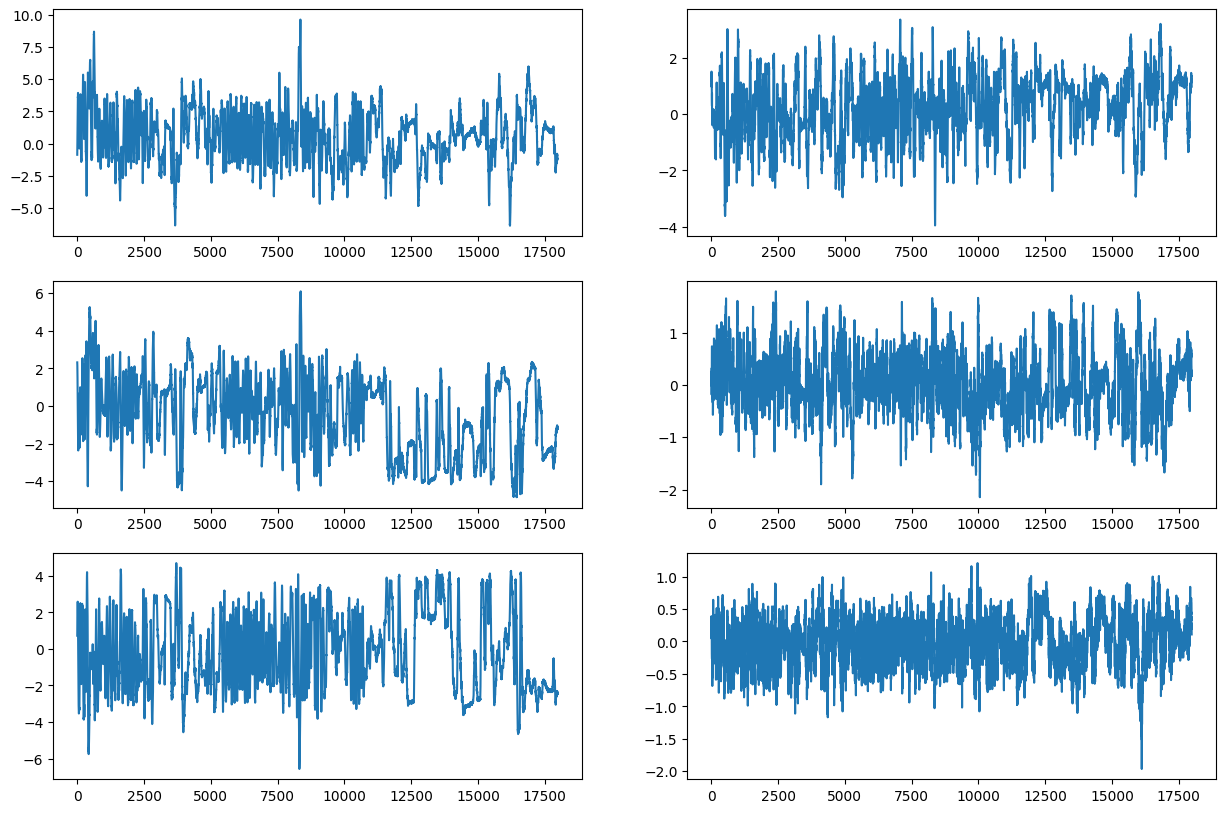

In [6]:
x = X[0]

fig, ax = subplots(nrows=3, ncols=2, figsize=(15,10))
for i in range(3):
  for j in range(2):
    ax[i,j].plot(x[i+3*j])

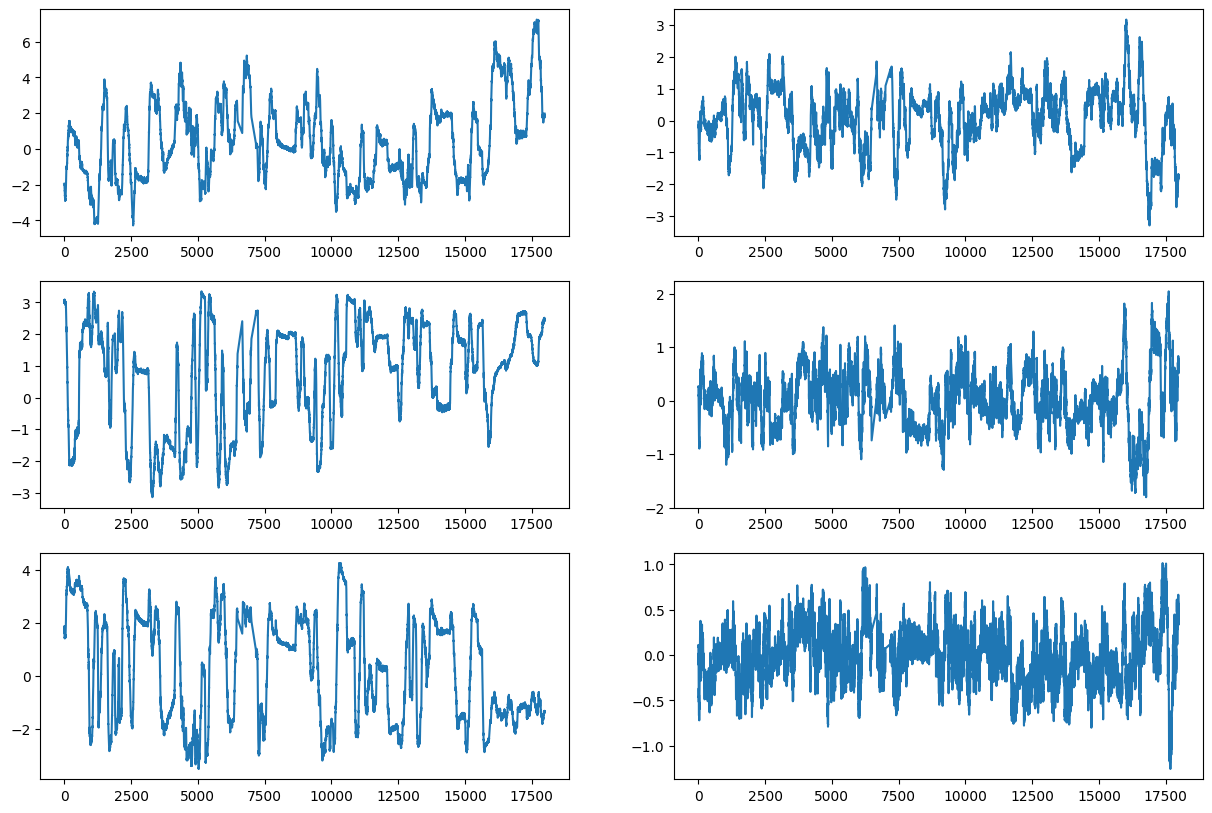

In [7]:
x = X[1]

fig, ax = subplots(nrows=3, ncols=2, figsize=(15,10))
for i in range(3):
  for j in range(2):
    ax[i,j].plot(x[i+3*j])

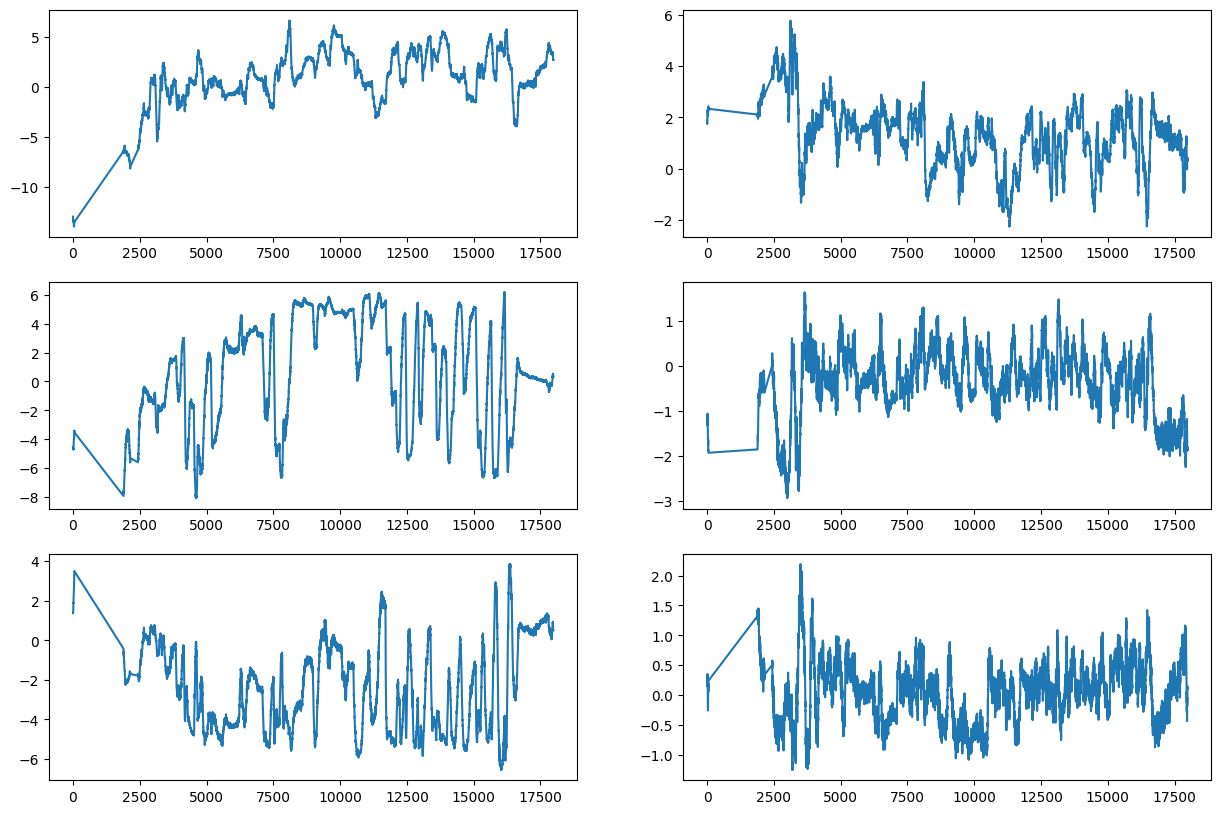

In [8]:
x = X[-1]

fig, ax = subplots(nrows=3, ncols=2, figsize=(15,10))
for i in range(3):
  for j in range(2):
    ax[i,j].plot(x[i+3*j])

### Plot superimposed channels

Plot the 6 channels of multiple observations superimposed.

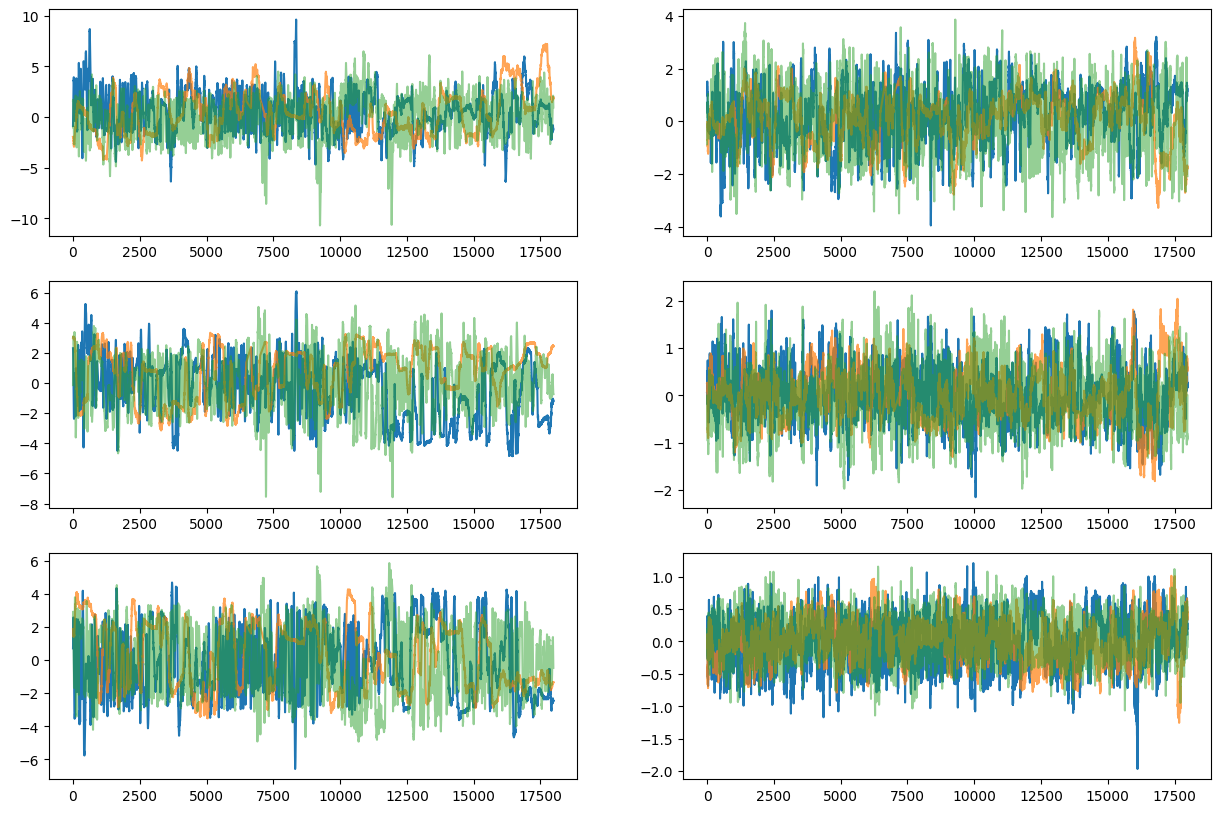

In [9]:
x = X[:3]

fig, ax = subplots(nrows=3, ncols=2, figsize=(15,10))
for i in range(3):
  for j in range(2):
    ax[i,j].plot(x[0][i+3*j], alpha=1)
    ax[i,j].plot(x[1][i+3*j], alpha=0.7)
    ax[i,j].plot(x[2][i+3*j], alpha=0.5)

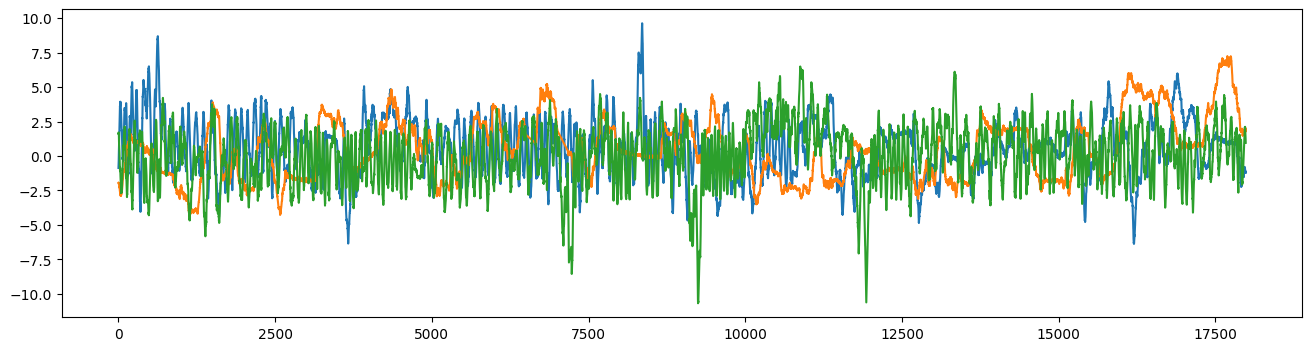

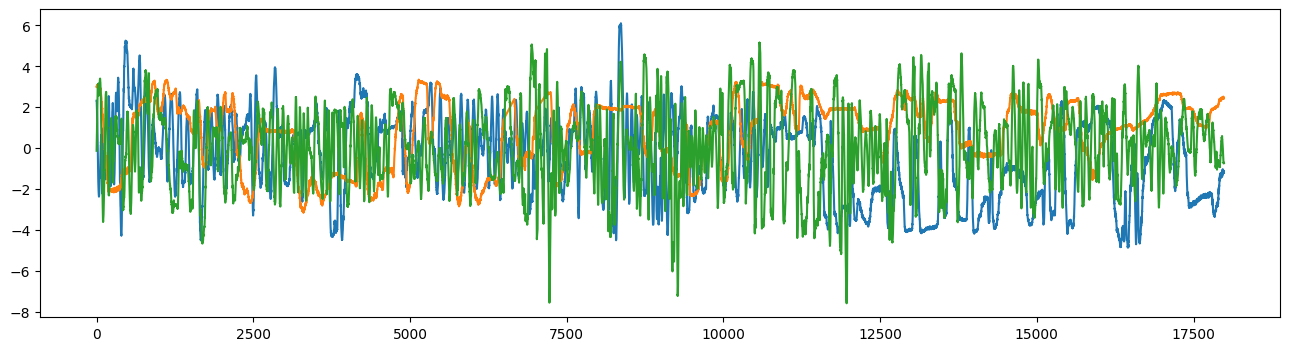

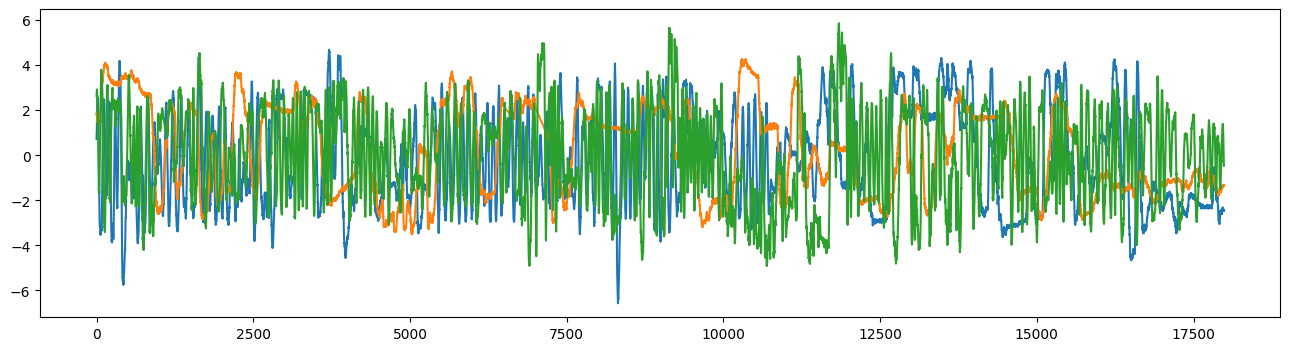

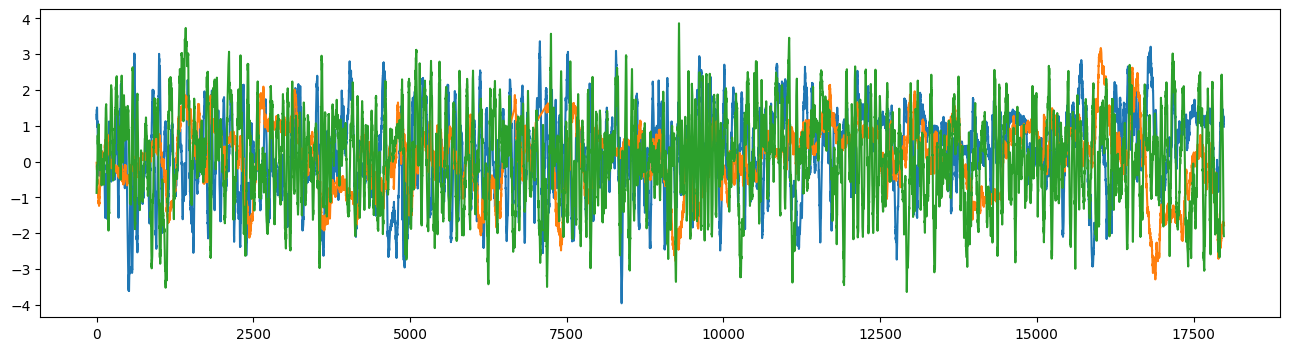

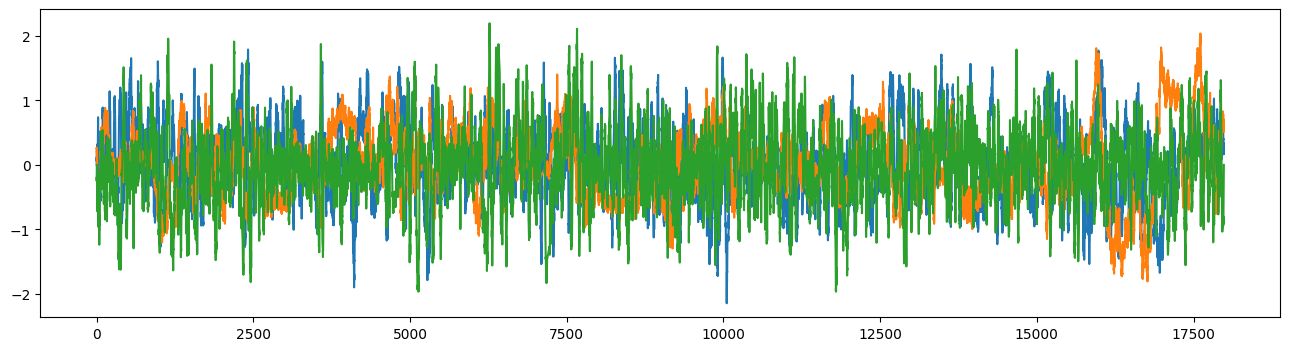

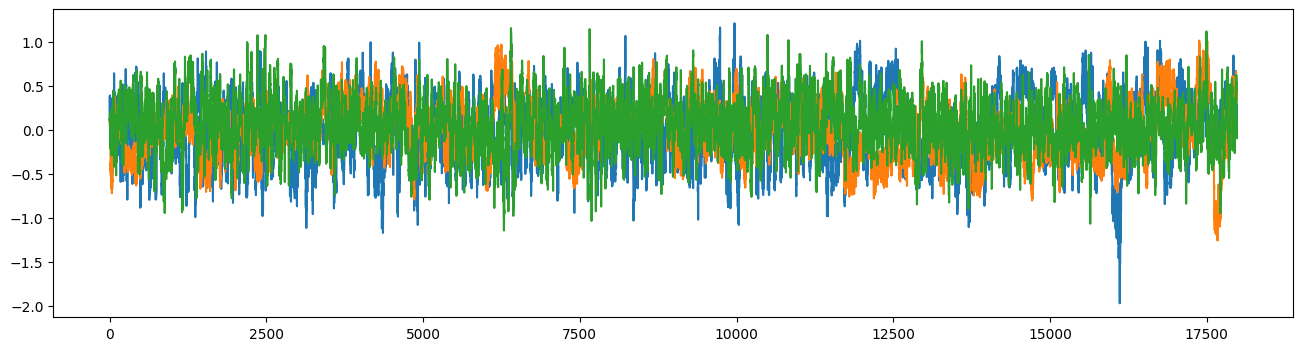

In [10]:
for i in range(6):
  _ = plot_series_collection(X[:3, i, :])

### Plot multiple classes

Plot a given channel of multiple observations from different classes.

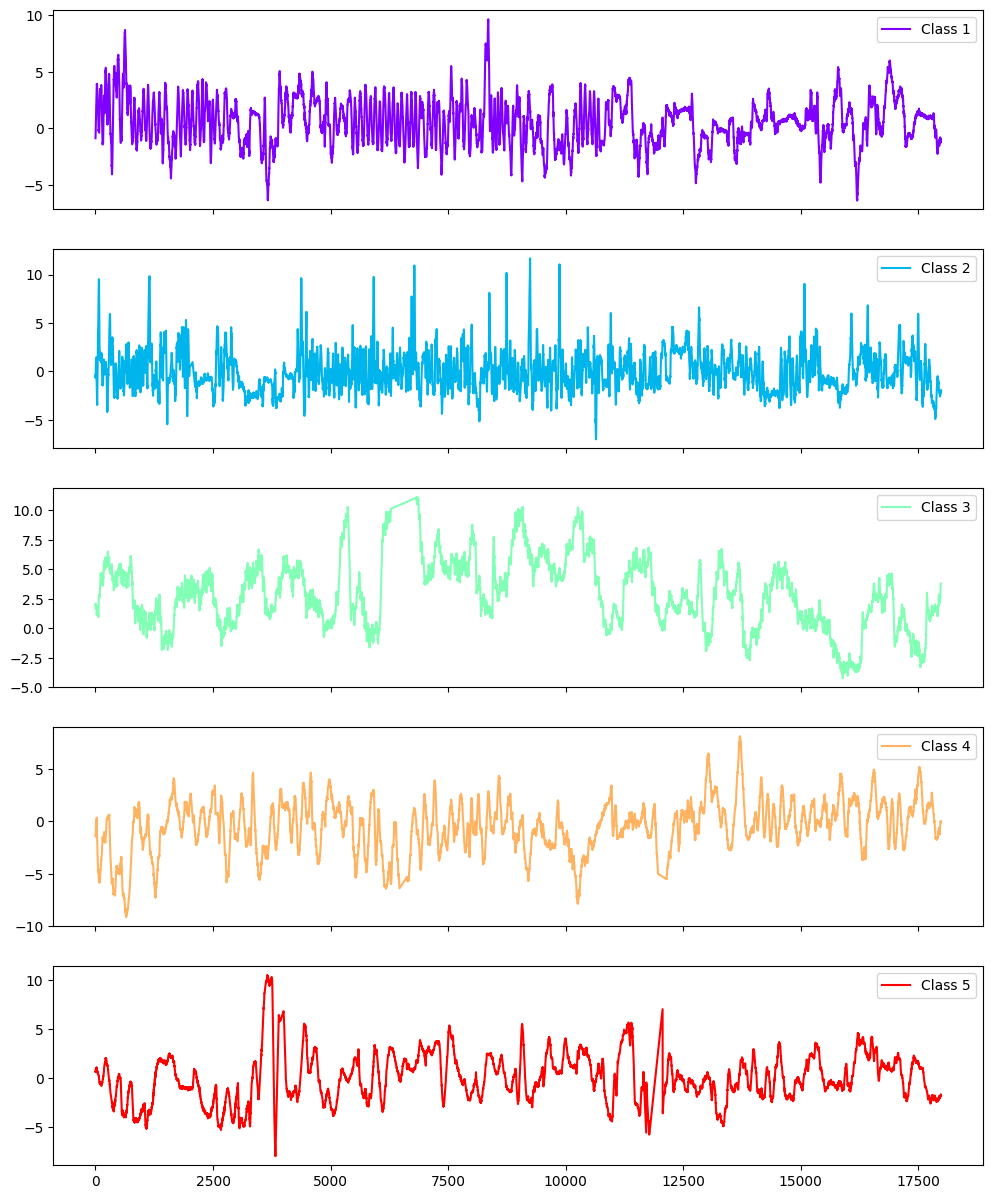

In [11]:
_, first_idx = np.unique(y, return_index=True)
# idx = []
# for i in range(3):
#   idx = np.concatenate((idx, first_idx + i)).astype(int)
idx = first_idx + 0

_ = plot_collection_by_class(X[idx, 0, :], y[idx])

### Plot mega time series (channel-wise)

Plot mega time series obtained by concatenating the time series of each channel.

(128, 1, 107904)


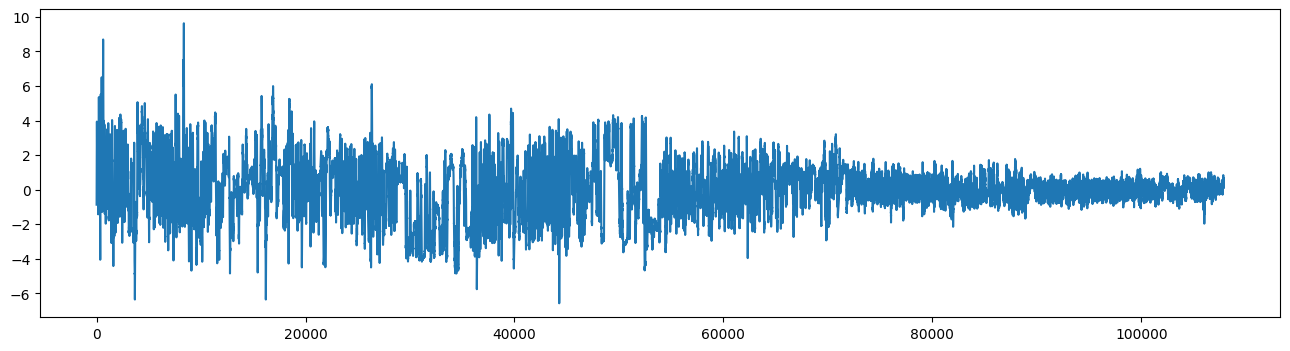

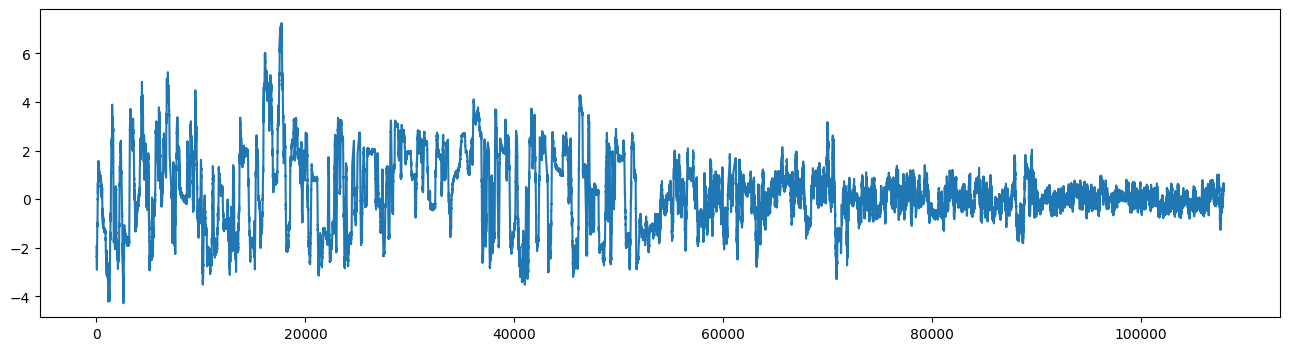

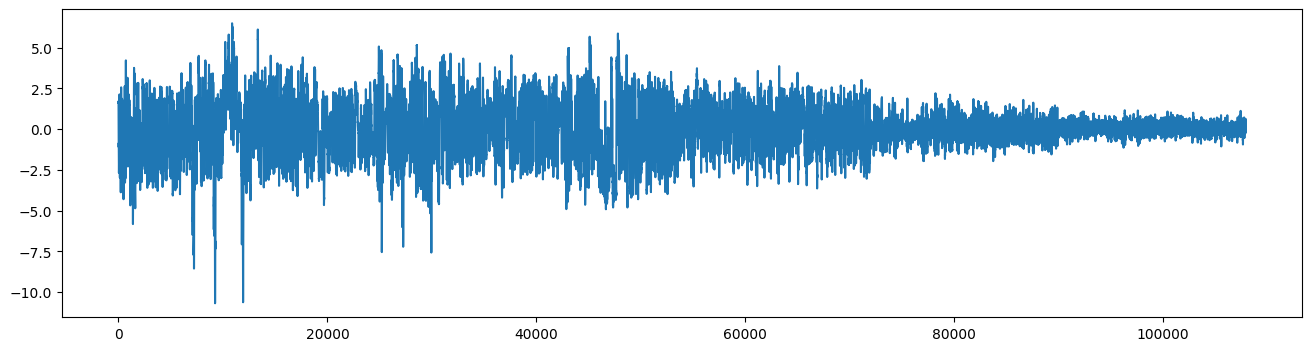

In [12]:
x = X.reshape(n_cases, -1)[:, np.newaxis, :]
print(x.shape)

for i in range(3):
  _ = plot_series_collection(x[[i],:])

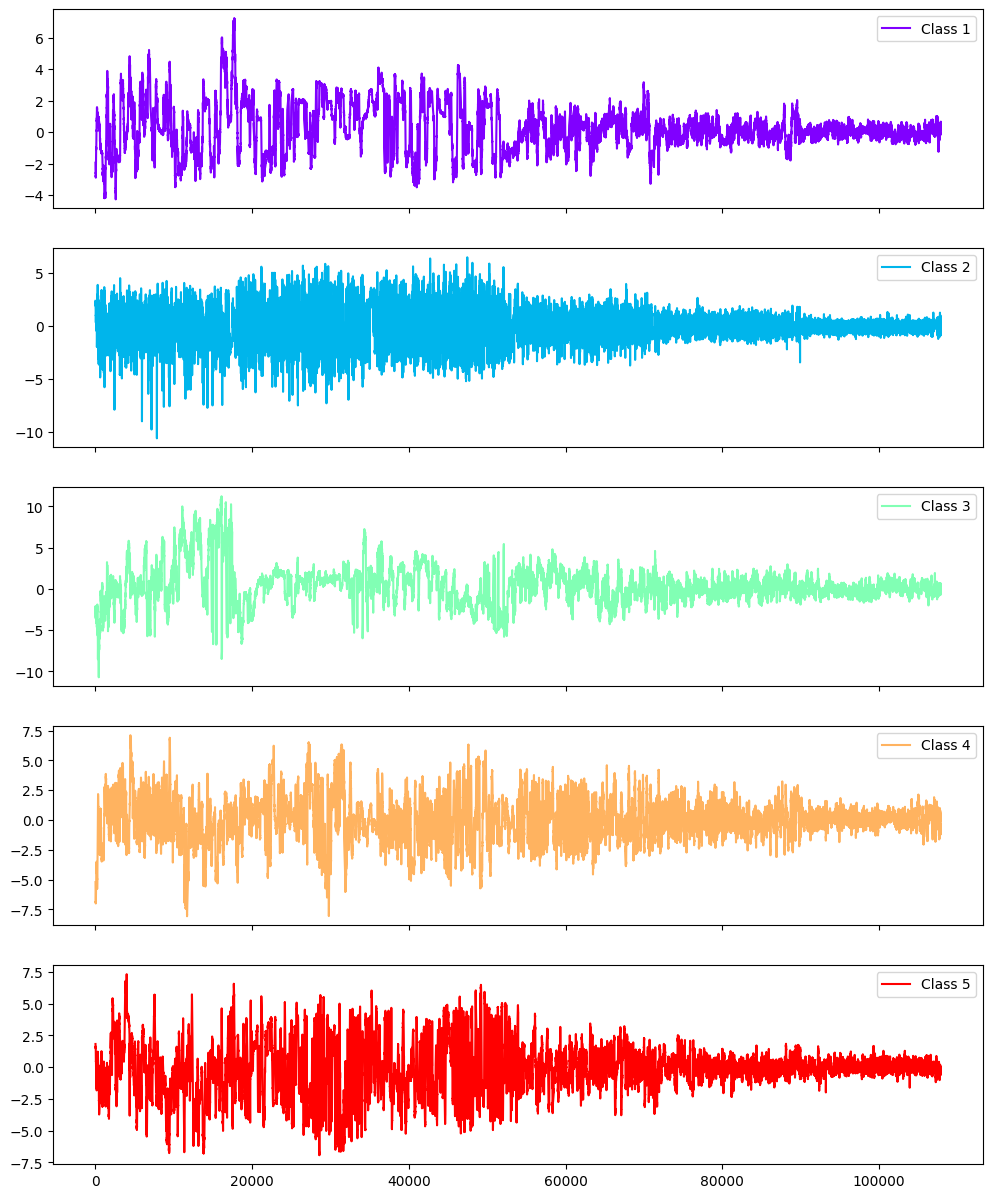

In [13]:
idx = first_idx + 1
_ = plot_collection_by_class(x[idx, :], y[idx])

### Plot mega time series (vector-wise)

Plot mega time series obtained by concatenating the vectors of channels' values at each timepoint.

(128, 1, 107904)


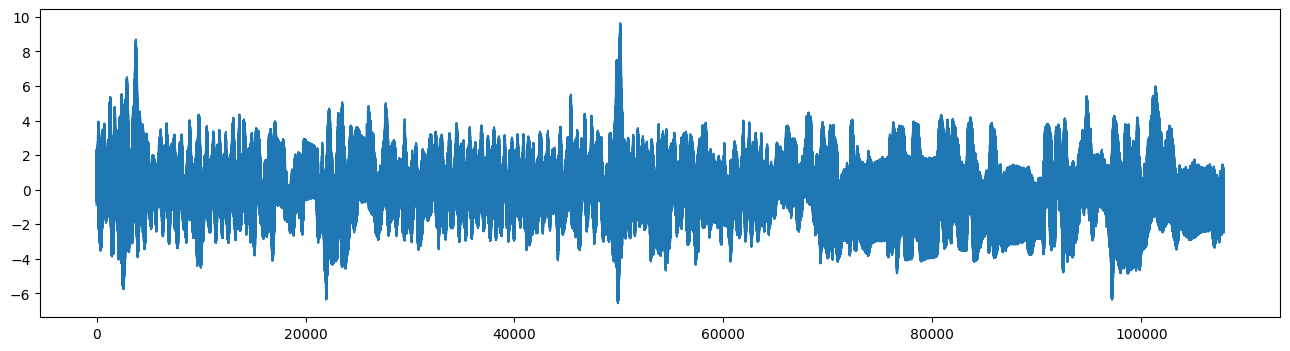

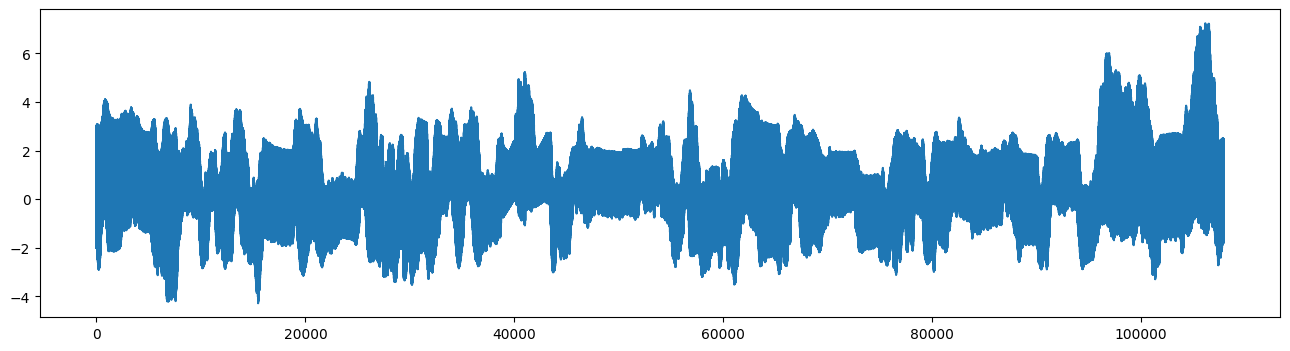

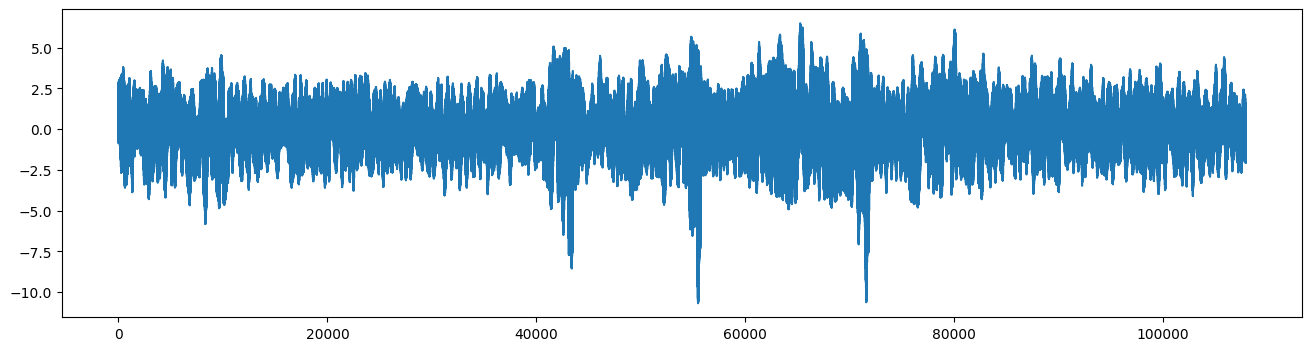

In [14]:
x = X.transpose(0, 2, 1).reshape(n_cases, 1, -1)
print(x.shape)

for i in range(3):
  _ = plot_series_collection(x[[i],:])

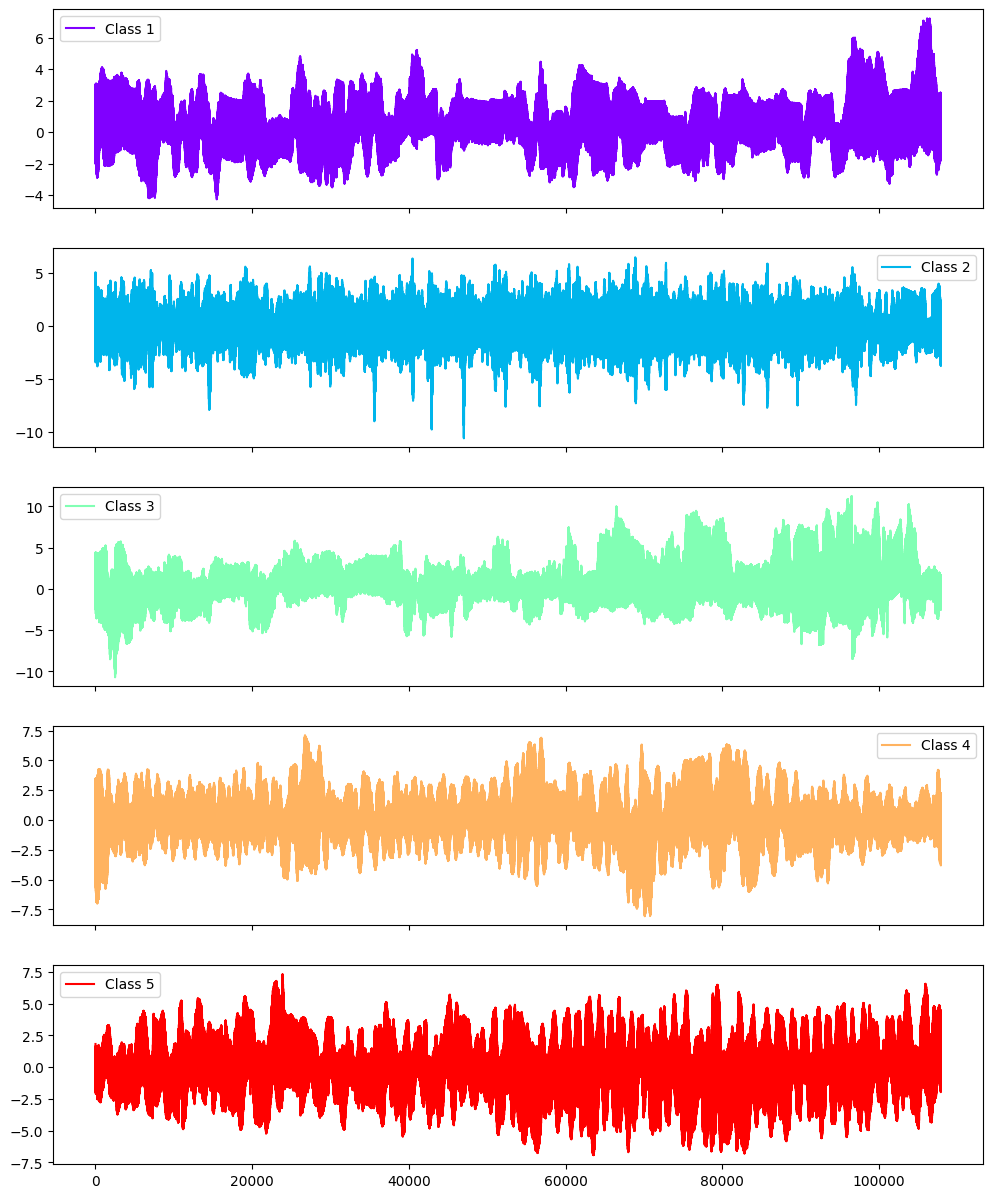

In [15]:
idx = first_idx + 1
_ = plot_collection_by_class(x[idx, :], y[idx])

Outliers (?)

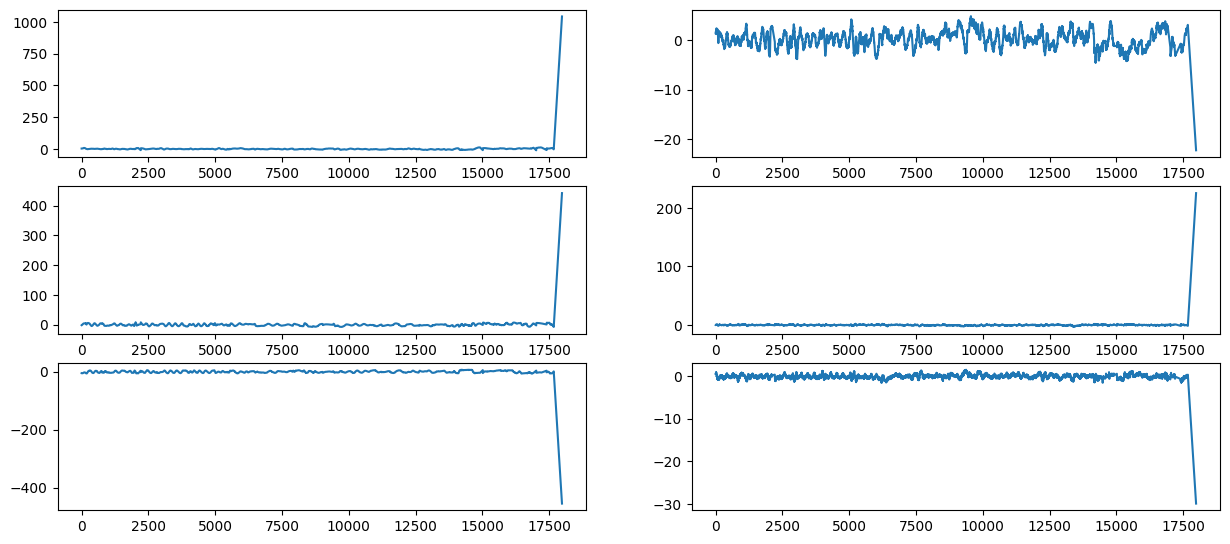

In [16]:
x = X[123]   # 15, 37, 41, 119, 122, 123

fig, ax = subplots(nrows=3, ncols=2, figsize=(15,6.5))
for i in range(3):
  for j in range(2):
    ax[i,j].plot(x[i+3*j])

## Distances + KNN

In [17]:
from aeon.distances import dtw_distance
from aeon.distances import create_bounding_matrix

from aeon.classification.distance_based import KNeighborsTimeSeriesClassifier
from sklearn import metrics

### Timing

Computing distances between observations takes too much time, even windowing.

In [18]:
a = X_test [0]
b = X_train[0]

for w in [1., .5, .2, .1, .05, .02, .01, .005, .001, .0005, .0001]:
  %time d = dtw_distance(a, b, window=w)
  print(f"\t window = {w*100 : >5.2f}% \t points = {w*a.shape[1] : <5.0f} \t distance = {d} \n")

CPU times: user 18.7 s, sys: 2.83 s, total: 21.6 s
Wall time: 21.8 s
	 window = 100.00% 	 points = 17984 	 distance = 297330.2669647838 

CPU times: user 14.3 s, sys: 2.37 s, total: 16.6 s
Wall time: 16.6 s
	 window = 50.00% 	 points = 8992  	 distance = 297330.2669647838 

CPU times: user 6.8 s, sys: 2.07 s, total: 8.87 s
Wall time: 8.84 s
	 window = 20.00% 	 points = 3597  	 distance = 297330.2669647838 

CPU times: user 4.14 s, sys: 2 s, total: 6.14 s
Wall time: 6.18 s
	 window = 10.00% 	 points = 1798  	 distance = 320738.18168063427 

CPU times: user 2.09 s, sys: 1.94 s, total: 4.03 s
Wall time: 3.99 s
	 window =  5.00% 	 points = 899   	 distance = 333619.3185017697 

CPU times: user 1.04 s, sys: 1.88 s, total: 2.92 s
Wall time: 2.89 s
	 window =  2.00% 	 points = 360   	 distance = 360075.9540422313 

CPU times: user 727 ms, sys: 1.9 s, total: 2.63 s
Wall time: 2.61 s
	 window =  1.00% 	 points = 180   	 distance = 377777.9006992677 

CPU times: user 719 ms, sys: 2.23 s, total: 

Doesn't change taking only one channel.

In [19]:
a = X_test [0,0]
b = X_train[0,0]

for w in [1., .5, .2, .1, .05, .02, .01, .005, .001, .0005, .0001]:
  %time d = dtw_distance(a, b, window=w)
  print(f"\t window = {w*100 : >5.2f}% \t points = {w*a.shape[0] : <5.0f} \t distance = {d} \n")

CPU times: user 14.7 s, sys: 2.09 s, total: 16.8 s
Wall time: 16.7 s
	 window = 100.00% 	 points = 17984 	 distance = 22391.288547891294 

CPU times: user 14 s, sys: 2.07 s, total: 16 s
Wall time: 17.3 s
	 window = 50.00% 	 points = 8992  	 distance = 22391.288547891294 

CPU times: user 6.53 s, sys: 2.03 s, total: 8.57 s
Wall time: 8.52 s
	 window = 20.00% 	 points = 3597  	 distance = 22460.089774160115 

CPU times: user 3.64 s, sys: 2.13 s, total: 5.77 s
Wall time: 5.77 s
	 window = 10.00% 	 points = 1798  	 distance = 23976.948932151892 

CPU times: user 1.99 s, sys: 1.91 s, total: 3.9 s
Wall time: 3.87 s
	 window =  5.00% 	 points = 899   	 distance = 24657.54889619782 

CPU times: user 1.05 s, sys: 1.98 s, total: 3.03 s
Wall time: 3.03 s
	 window =  2.00% 	 points = 360   	 distance = 35813.385158082645 

CPU times: user 742 ms, sys: 2.22 s, total: 2.96 s
Wall time: 3 s
	 window =  1.00% 	 points = 180   	 distance = 46507.90212034578 

CPU times: user 601 ms, sys: 1.89 s, total:

### Downsampling

Try to reduce dimension by downsampling.

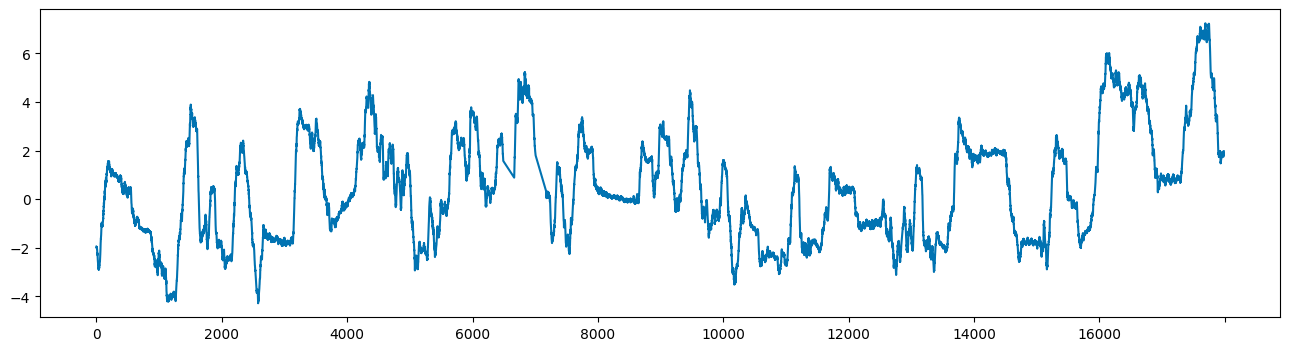

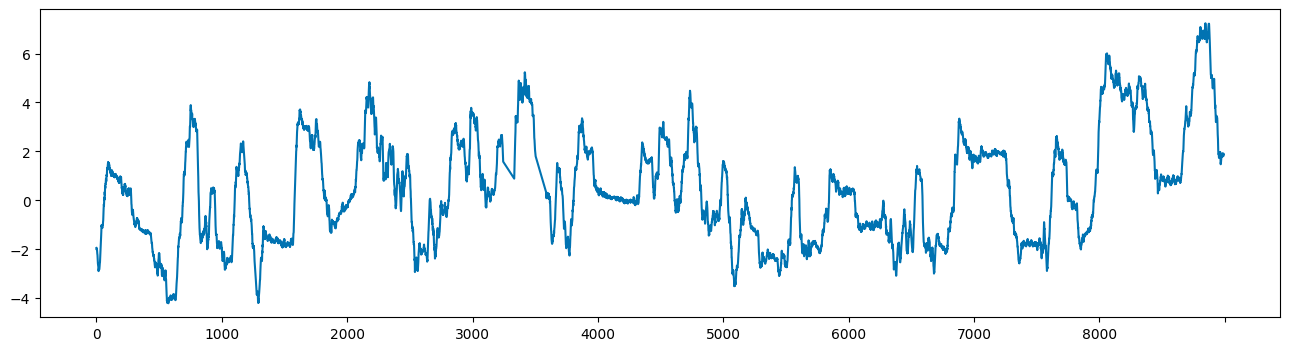

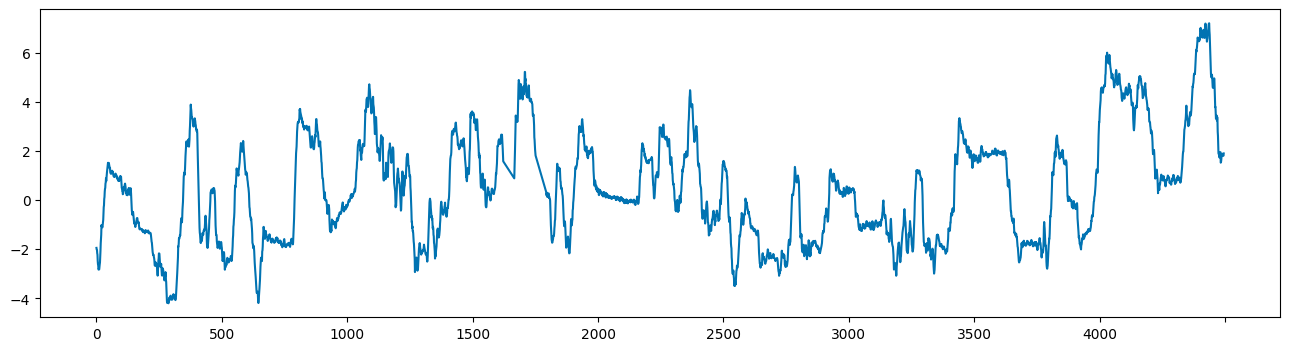

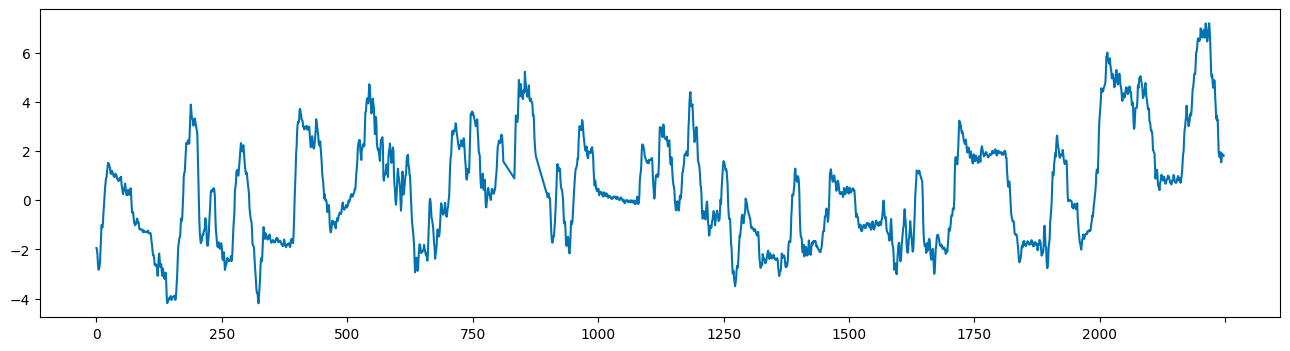

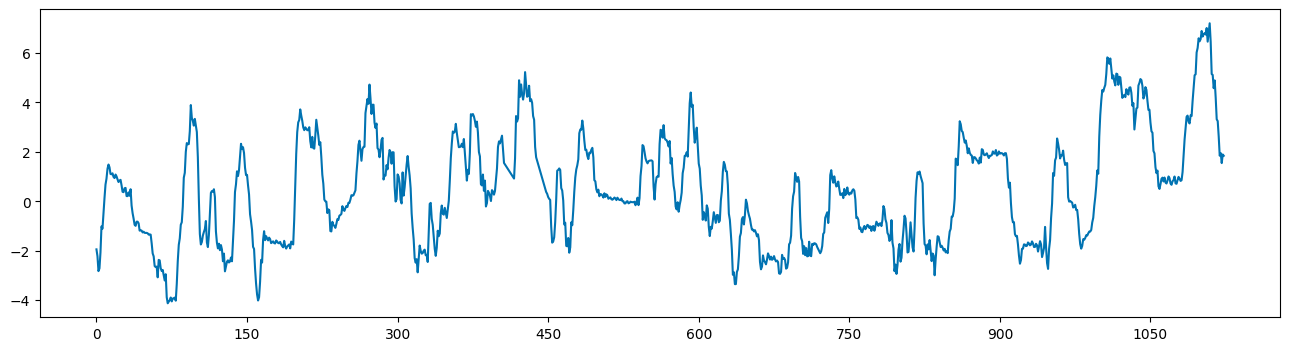

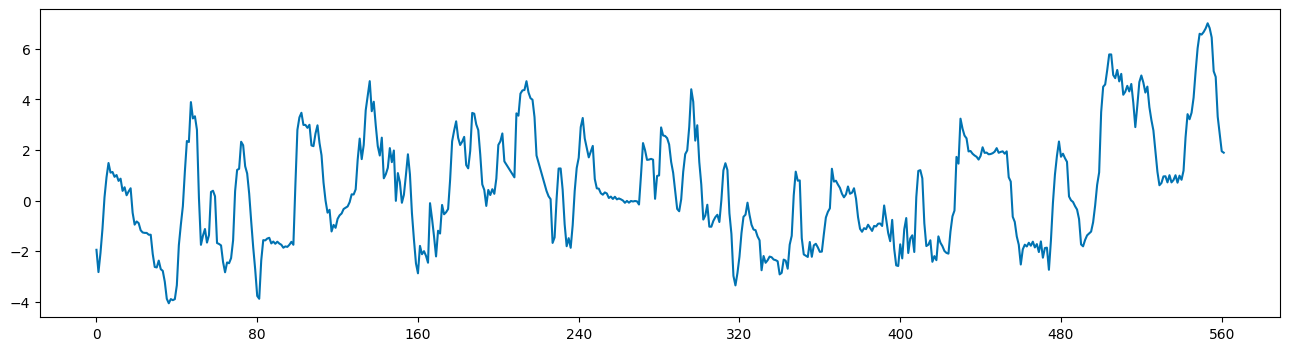

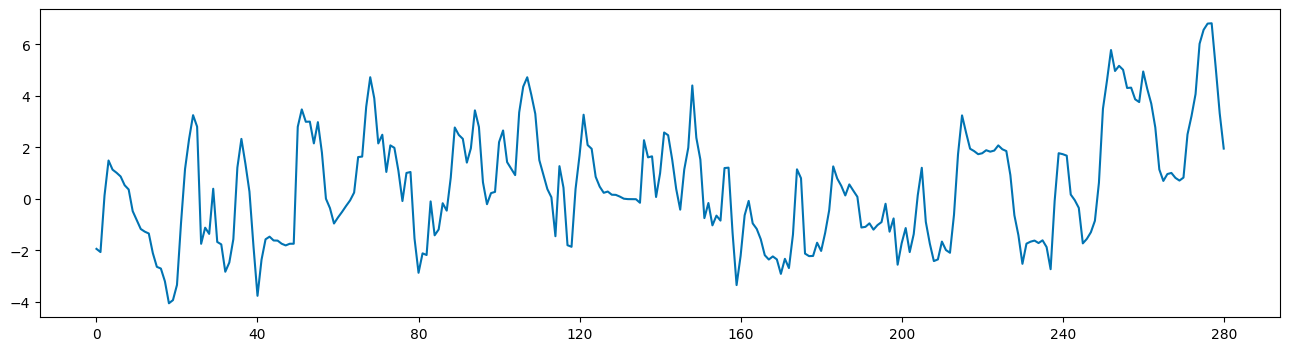

In [20]:
X = X_train[1,0]
_ = plot_series(X      , markers=' ')
_ = plot_series(X[::2] , markers=' ')
_ = plot_series(X[::4] , markers=' ')
_ = plot_series(X[::8] , markers=' ')
_ = plot_series(X[::16], markers=' ')
_ = plot_series(X[::32], markers=' ')
_ = plot_series(X[::64], markers=' ')

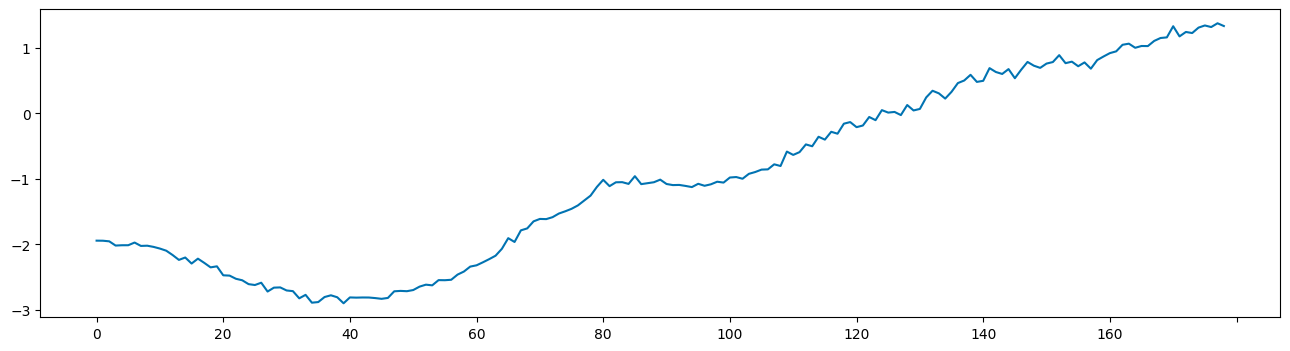

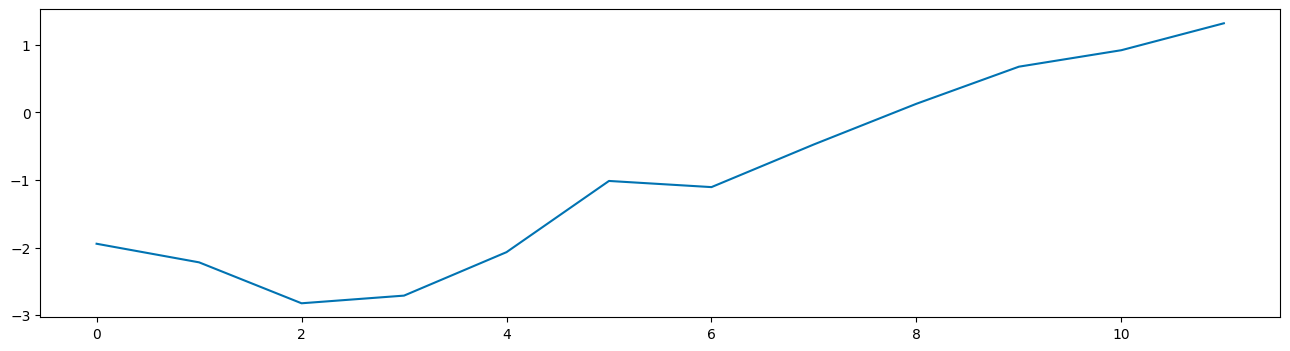

In [21]:
first = int(0.01 * n_timepoints)
_ = plot_series(X[:first   ], markers=' ')
_ = plot_series(X[:first:16], markers=' ')

In [22]:
step = 32
a = X_test [0, :, ::step]
b = X_train[0, :, ::step]

for w in [1., .5, .2, .1, .05, .02, .01]:
  %time d = dtw_distance(a, b, window=w)
  print(f"\t window = {w*100 : >5.2f}% \t points = {w*a.shape[1] : <5.0f} \t distance = {d} \n")

CPU times: user 1.47 s, sys: 110 ms, total: 1.58 s
Wall time: 1.57 s
	 window = 100.00% 	 points = 562   	 distance = 10432.415350877984 

CPU times: user 12.3 ms, sys: 22 µs, total: 12.3 ms
Wall time: 12.3 ms
	 window = 50.00% 	 points = 281   	 distance = 10432.415350877984 

CPU times: user 6.53 ms, sys: 0 ns, total: 6.53 ms
Wall time: 6.55 ms
	 window = 20.00% 	 points = 112   	 distance = 10432.415350877984 

CPU times: user 4.1 ms, sys: 0 ns, total: 4.1 ms
Wall time: 4.12 ms
	 window = 10.00% 	 points = 56    	 distance = 10872.037839268856 

CPU times: user 2.27 ms, sys: 0 ns, total: 2.27 ms
Wall time: 2.28 ms
	 window =  5.00% 	 points = 28    	 distance = 11224.982625704013 

CPU times: user 1.34 ms, sys: 0 ns, total: 1.34 ms
Wall time: 1.35 ms
	 window =  2.00% 	 points = 11    	 distance = 11972.230463317735 

CPU times: user 1.03 ms, sys: 0 ns, total: 1.03 ms
Wall time: 1.04 ms
	 window =  1.00% 	 points = 6     	 distance = 12520.556028149176 



Compute time to compare two observations and the total time to compare each test sample to each other training sample for various downsampling step values.

In [23]:
M = n_cases * n_test_cases

for k in range(6+1):
  step = 2**k
  a = X_test [0, :, ::step]
  b = X_train[0, :, ::step]

  timings = %timeit -n 1 -r 1 -o dtw_distance(a, b, window=0.2)
  print(f"step = {step : >3} \t time (s) = {timings.best : .4f} \t total time (min) = {timings.best*M/60 : .2f} \n")

9.14 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
step =   1 	 time (s) =  9.1409 	 total time (min) =  2554.58 

2.23 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
step =   2 	 time (s) =  2.2267 	 total time (min) =  622.28 

514 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
step =   4 	 time (s) =  0.5136 	 total time (min) =  143.55 

97.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
step =   8 	 time (s) =  0.0976 	 total time (min) =  27.27 

24 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
step =  16 	 time (s) =  0.0240 	 total time (min) =  6.72 

6.26 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
step =  32 	 time (s) =  0.0063 	 total time (min) =  1.75 

1.58 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
step =  64 	 time (s) =  0.0016 	 total time (min) =  0.44 



### Classify

Use a KNN classifier on the distances for various values of `k`.

In [24]:
step = 64
X_train_reduced = X_train[:, :, ::step]
X_test_reduced  = X_test [:, :, ::step]
print(X_train_reduced.shape)

knns = []
for k in range(1,10+1):
  knn = KNeighborsTimeSeriesClassifier(
      n_neighbors     = k,
      weights         = 'distance',
      distance        = 'dtw',
      distance_params = {'window': 0.2},
  )
  knn.fit(X_train_reduced, y_train)
  knn_preds = knn.predict(X_test_reduced)
  acc = metrics.accuracy_score(y_test, knn_preds)

  knns.append(knn)
  print(f"k = {k} \t accuracy = {acc}")

(128, 6, 281)
k = 1 	 accuracy = 0.6030534351145038
k = 2 	 accuracy = 0.6030534351145038
k = 3 	 accuracy = 0.5954198473282443
k = 4 	 accuracy = 0.6030534351145038
k = 5 	 accuracy = 0.5954198473282443
k = 6 	 accuracy = 0.5954198473282443
k = 7 	 accuracy = 0.5725190839694656
k = 8 	 accuracy = 0.5801526717557252
k = 9 	 accuracy = 0.5877862595419847
k = 10 	 accuracy = 0.5954198473282443


In [25]:
knn = knns[5-1]

### Feature occlusion

Perform feature occlusion evaluated on the predicted class.

In [26]:
l_reduced     = X_test_reduced.shape[2]

for c in range(n_channels):
  X_occluded = X_test_reduced.copy()
  X_occluded[:,c,:] = 0

  knn_preds = knn.predict(X_occluded)
  acc = metrics.accuracy_score(y_test, knn_preds)
  print(f"channel = {c} \t accuracy = {acc}")

channel = 0 	 accuracy = 0.29770992366412213
channel = 1 	 accuracy = 0.48091603053435117
channel = 2 	 accuracy = 0.48854961832061067
channel = 3 	 accuracy = 0.5572519083969466
channel = 4 	 accuracy = 0.5877862595419847
channel = 5 	 accuracy = 0.5954198473282443


Feature occlusion evaluated on the class probability vector.

**Attenzione**: `predict_proba` fa [cose strane](https://stackoverflow.com/questions/17017882/scikit-learn-predict-proba-gives-wrong-answers), sarebbe meglio implementare a mano.

In [27]:
class_probs = knn.predict_proba(X_test_reduced)

print(knn.classes_)
print(np.array_str(class_probs[:25], precision=2, suppress_small=True))

['1' '2' '3' '4' '5']
[[0.61 0.19 0.   0.2  0.  ]
 [1.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.  ]
 [0.6  0.4  0.   0.   0.  ]
 [0.79 0.   0.21 0.   0.  ]
 [1.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.  ]
 [0.79 0.   0.   0.21 0.  ]
 [0.8  0.2  0.   0.   0.  ]
 [0.8  0.2  0.   0.   0.  ]
 [0.79 0.21 0.   0.   0.  ]
 [1.   0.   0.   0.   0.  ]
 [0.8  0.2  0.   0.   0.  ]
 [0.6  0.21 0.19 0.   0.  ]
 [1.   0.   0.   0.   0.  ]
 [0.8  0.2  0.   0.   0.  ]
 [0.8  0.2  0.   0.   0.  ]
 [1.   0.   0.   0.   0.  ]
 [0.61 0.   0.39 0.   0.  ]
 [1.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.  ]
 [0.8  0.2  0.   0.   0.  ]
 [0.8  0.2  0.   0.   0.  ]
 [1.   0.   0.   0.   0.  ]]


In [28]:
class_probs_occluded = {c : [] in range(n_channels)}

for c in range(n_channels):
  X_occluded = X_test_reduced.copy()
  X_occluded[:,c,:] = 0

  class_probs_occluded[c] = knn.predict_proba(X_occluded)

### Barycentric coordinates shenanigans

[Simplex cartesian coordinates](https://en.wikipedia.org/wiki/Simplex#Cartesian_coordinates_for_a_regular_n-dimensional_simplex_in_Rn)

$$ S = \frac{1}{\sqrt{2}} I_n - \frac{1}{n\sqrt{2}} \Bigl( 1 + \frac{1}{\sqrt{n+1}} \Bigr) E_n , \qquad (E_n)_{ij} = 1 \quad \forall\ \ 1 \leq i,j \leq n $$

[Barycentric -> Cartesian](https://en.wikipedia.org/wiki/Barycentric_coordinate_system#Conversion_between_barycentric_and_Cartesian_coordinates)

$$
\begin{pmatrix}
  c_1 \\ c_2 \\ \vdots \\ c_{n}
\end{pmatrix}
=
\begin{pmatrix}
  x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(n+1)} \\
  x_2^{(1)} & x_2^{(2)} & \cdots & x_2^{(n+1)} \\
  \vdots & & & \vdots \\
  x_n^{(1)} & x_n^{(2)} & \cdots & x_n^{(n+1)} \\
\end{pmatrix}
\begin{pmatrix}
  b_1 \\ b_2 \\ \vdots \\ b_{n+1}
\end{pmatrix}
$$

In [29]:
def bary_to_cart(b):
  b = np.array(b)
  n = b.size - 1
  S = (1/np.sqrt(2)) * np.identity(n) - (1/(n*np.sqrt(2))) * (1+1/(np.sqrt(n+1)))
  last = (1/np.sqrt(2*(n+1))) * np.ones(n)
  S = np.hstack([S, last[:, np.newaxis]])
  return S @ b

S =
 [[ 0.14942925 -0.55767754  0.40824829]
 [-0.55767754  0.14942925  0.40824829]]
C =
 [[ 0.06670673  0.13741741]
 [-0.06270279 -0.3455455 ]]


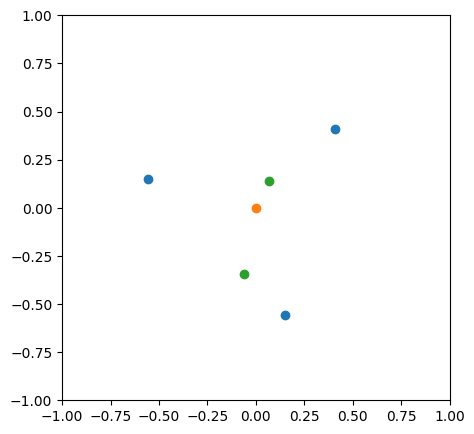

In [30]:
n = 2
S = (1/np.sqrt(2)) * np.identity(n) - (1/(n*np.sqrt(2))) * (1+1/(np.sqrt(n+1)))
last = (1/np.sqrt(2*(n+1))) * np.ones(n)
S = np.hstack([S, last[:, np.newaxis]])
print(f"S =\n {S}")

b1 = [0.2, 0.3, 0.5]
b2 = [0.7, 0.3, 0.0]
c1 = bary_to_cart(b1)
c2 = bary_to_cart(b2)
C = np.stack([c1, c2])
print(f"C =\n {C}")
x = C[:,0]
y = C[:,1]

fig, ax = subplots(figsize=(5,5))
ax.scatter(S[0], S[1])
ax.scatter([0], [0])
ax.scatter(x, y)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
fig.show()

**Fun fact**: non serve a niente perché le probabilità stanno già sul simplesso standard in $\mathbb{R}^n$, quindi basta calcolare la distanza euclidea sui punti non trasformati (cioè pensare le coordinate baricentriche come coordinate cartesiane di $\mathbb{R}^{n+1}$).

### Back to feature occlusion

In [31]:
from numpy import linalg as LA

In [32]:
probs_distances = {c : [] for c in range(n_channels)}

for c in range(n_channels):
  X_occluded = X_test_reduced.copy()
  X_occluded[:,c,:] = 0

  probs_distances[c] = LA.norm(class_probs - class_probs_occluded[c], axis=1)

print(np.array_str(probs_distances[0], precision=2, suppress_small=True))

[0.01 1.13 1.41 0.57 0.28 0.   0.85 1.13 0.   0.29 0.28 1.12 0.86 1.13
 0.28 0.28 0.27 0.86 0.48 0.27 1.14 0.85 0.86 0.85 1.13 1.14 0.85 0.56
 0.85 0.85 0.   0.28 0.29 0.57 1.13 1.14 0.75 1.14 0.85 0.01 1.14 0.85
 0.27 1.13 1.13 0.85 1.13 0.49 1.14 0.28 1.14 1.41 0.   0.57 0.84 0.28
 0.   1.13 0.58 0.27 0.55 0.28 0.85 0.85 0.56 0.   0.   0.28 0.   0.27
 0.56 0.27 0.28 0.85 0.57 0.85 0.28 0.56 1.   0.02 0.31 0.48 0.85 0.97
 0.41 0.47 0.58 0.28 0.86 0.41 0.63 0.02 0.28 0.48 0.01 0.   0.59 0.29
 0.47 0.49 0.77 0.   0.29 0.   1.14 1.13 1.13 0.28 0.   1.14 0.28 0.25
 0.3  0.28 0.28 0.4  0.59 0.29 0.28 0.27 0.72 0.86 0.45 0.28 0.64 0.69
 0.27 0.27 0.58 0.28 0.28]


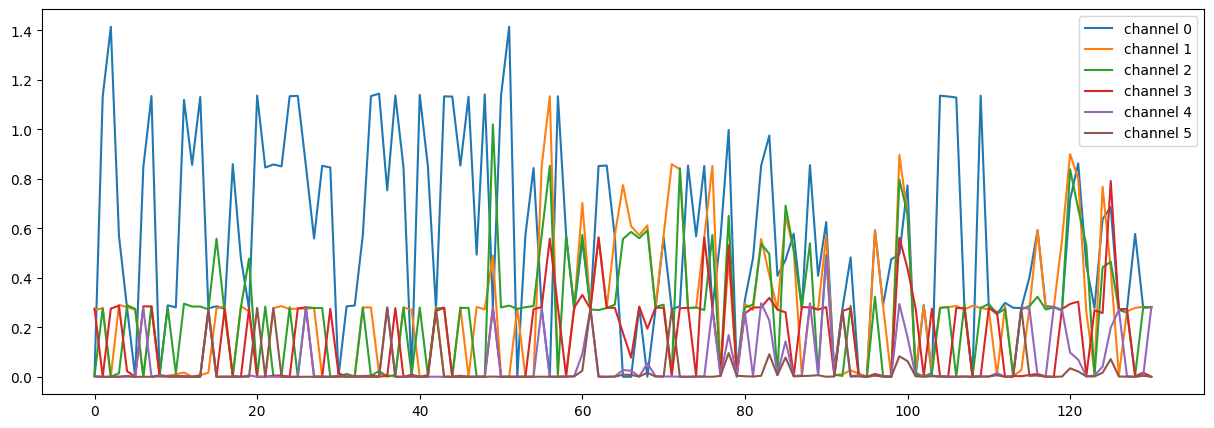

In [33]:
fig, ax = subplots(figsize=(15,5))
for c in range(n_channels):
  ax.plot(probs_distances[c], label=f"channel {c}")
ax.legend()
fig.show()

In [34]:
for c in range(n_channels):
  print(f"{probs_distances[c].sum()  : >10.4f}")

   73.6036
   35.2461
   33.7305
   19.6935
    7.2479
    3.1711


## LSTM

### Example code

Example LSTM + attention mechanism.

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 20, 64)    │     64,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ [(None, 20, 128), │     66,048 │ embedding[0][0]   │
│ (Bidirectional)     │ (None, 64),       │            │                   │
│                     │ (None, 64),       │            │                   │
│                     │ (None, 64),       │            │                   │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ bidirectional[0]… │
│ (Concatenate)       │                   │            │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bahdanau_attention  │ [(None, 128),     │     32,897 │ concatenate[0][0… │
│ (BahdanauAttention) │ (None, 20, 1)]    │            │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ final_output        │ (None, 1)         │        129 │ bahdanau_attenti… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 163,074 (637.01 KB)

 Trainable params: 163,074 (637.01 KB)

 Non-trainable params: 0 (0.00 B)

None 

X_train:  (500, 20)
y_train:  (500, 1)


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.4819 - loss: 0.6934 - val_accuracy: 0.5200 - val_loss: 0.6933
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8163 - loss: 0.6873 - val_accuracy: 0.5900 - val_loss: 0.6920
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9533 - loss: 0.6531 - val_accuracy: 0.5300 - val_loss: 0.6992
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9406 - loss: 0.3437 - val_accuracy: 0.5300 - val_loss: 1.3202
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9487 - loss: 0.1185 - val_accuracy: 0.5000 - val_loss: 1.4246


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
Final Prediction: 0.0200
Shape of attention weights: (1, 20, 1)


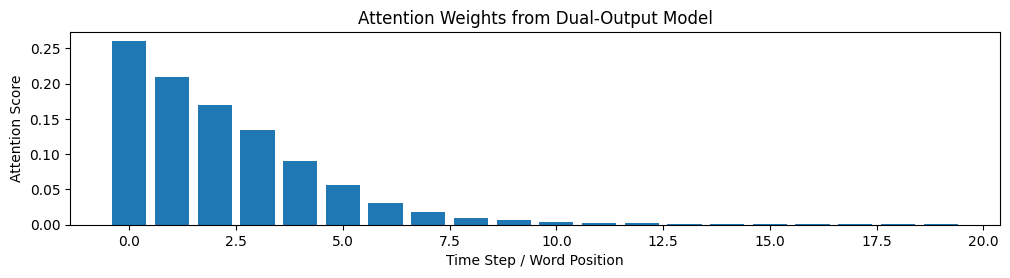

In [35]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# (The BahdanauAttention class definition remains the same)
class BahdanauAttention(keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.W1 = keras.layers.Dense(units, use_bias=False)
        self.W2 = keras.layers.Dense(units, use_bias=False)
        self.V = keras.layers.Dense(1)
    def call(self, query, values):
        query_with_time_axis = tf.expand_dims(query, 1)
        score = self.V(tf.nn.tanh(self.W1(values) + self.W2(query_with_time_axis)))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights


# Model parameters
VOCAB_SIZE = 1000
MAX_LENGTH = 20
EMBEDDING_DIM = 64
RNN_UNITS = 64
BATCH_SIZE = 32

# Define the base layers for both models
inputs = keras.Input(shape=(MAX_LENGTH,))
embedding = keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM)(inputs)
lstm, forward_h, forward_c, backward_h, backward_c = keras.layers.Bidirectional(
    keras.layers.LSTM(RNN_UNITS, return_sequences=True, return_state=True)
)(embedding)
state_h = keras.layers.Concatenate()([forward_h, backward_h])

# Use the same attention layer instance for both models
attention_layer = BahdanauAttention(128)
context_vector, attention_weights = attention_layer(state_h, lstm)

# Use the same dense layer instance for both models
final_output_layer = keras.layers.Dense(1, activation='sigmoid', name='final_output')
final_output = final_output_layer(context_vector)


# 1. Build the training model (only final output)
train_model = keras.Model(
    inputs=inputs,
    outputs=final_output
)

# 2. Build the dual-output model for prediction and visualization
dual_model = keras.Model(
    inputs=inputs,
    outputs=[final_output, attention_weights]
)


# Compile the training model
train_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(train_model.summary(), "\n")

# Generate random data
X_train_example = np.random.randint(0, VOCAB_SIZE, size=(500, MAX_LENGTH))
y_train_example = np.random.randint(0, 2, size=(500, 1))
print("X_train: ", X_train_example.shape)
print("y_train: ", y_train_example.shape)
print("\n")

# Train the model
train_model.fit(X_train_example, y_train_example, epochs=5, batch_size=BATCH_SIZE, validation_split=0.2)
print("\n")


# 3. Use the dual-output model for prediction and get both outputs at once
test_sample = X_train_example[0:1]
prediction, attention_w = dual_model.predict(test_sample)

print(f"Final Prediction: {prediction[0][0]:.4f}")
print(f"Shape of attention weights: {attention_w.shape}")

# 4. Visualize the weights
plt.figure(figsize=(12, 2.5))
plt.bar(range(MAX_LENGTH), attention_w.squeeze())
plt.title('Attention Weights from Dual-Output Model')
plt.xlabel('Time Step / Word Position')
plt.ylabel('Attention Score')
plt.show()

### Back to our data

Function to plot the time series colored according to the attention weights for the attribution.

In [36]:
from matplotlib.collections import LineCollection
from matplotlib import cm, colors

rng = np.random.default_rng(2025)

In [37]:
def color_segments(x, y, intensity):
  points   = np.array([x, y]).T.reshape(-1, 1, 2)
  segments = np.concatenate([points[:-1], points[1:]], axis=1)

  lc = LineCollection(
      segments,
      cmap  = "plasma",
      array = intensity
  )
  return lc


def plot_attention(X, attention_w):
  lc = color_segments(
      range(MAX_LENGTH),
      X.squeeze(),
      attention_w.squeeze()
  )

  fig, ax = subplots()
  ax.add_collection(lc)
  ax.autoscale()

  cbar = fig.colorbar(lc, ax=ax)
  cbar.set_label("attention weights")

  return fig, ax, cbar

### Univariate

First let's try the univariate version.

X_train shape:  (128, 843, 1)
y_train:  [4 0 1 0 0 1 0 3 0 1 4 2 2 0 0 0 0 0 4 3 3 0 1 1 0 0 2 0 3 3 3 4 0 2 0 0 0
 4 1 3 1 2 3 0 2 2 2 0 1 2 0 2 2 3 0 0 0 4 0 0 1 4 1 0 4 3 0 0 1 0 0 1 3 0
 2 0 0 1 3 0 2 1 4 4 4 3 0 1 1 3 0 1 4 2 0 0 2 0 1 3 1 0 3 3 3 1 0 1 0 0 0
 0 0 0 0 0 1 3 2 0 0 0 3 0 3 0 3 2]


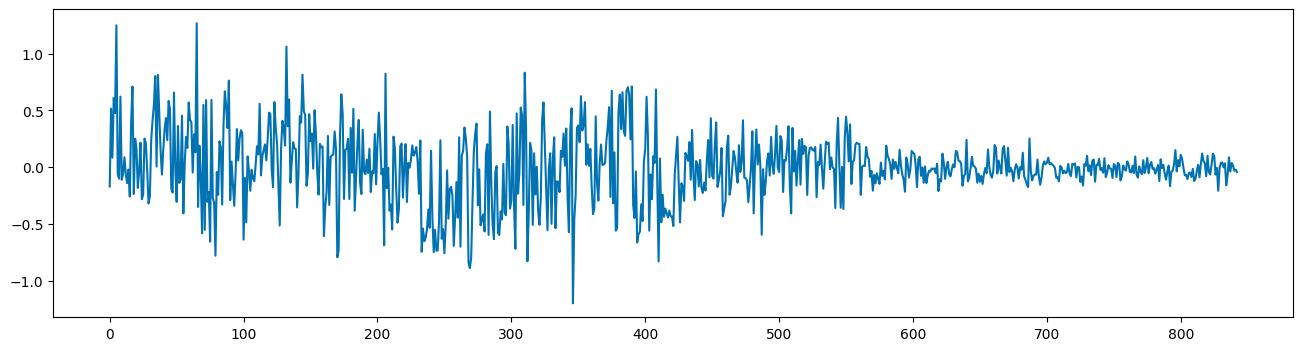

In [38]:
X_train_uni = X_train.reshape(n_cases     , -1)
X_test_uni  = X_test .reshape(n_test_cases, -1)
# X_train_uni = X_train[:, 0, :]
# X_test_uni  = X_test [:, 0, :]

train_mean = X_train_uni.mean()
train_std  = X_train_uni.std()
X_train_normalized = (X_train_uni - train_mean) / train_std
X_test_normalized  = (X_test_uni  - train_mean) / train_std

step = 128
X_train_reduced = X_train_normalized[:, ::step]
X_test_reduced  = X_test_normalized [:, ::step]

X_train_RNN = X_train_reduced[:, :, np.newaxis]
X_test_RNN  = X_test_reduced [:, :, np.newaxis]

print("X_train shape: ", X_train_RNN.shape)
_ = plot_series(X_train_RNN[0], markers=' ')


y_train_num = y_train.astype(int) - 1
y_test_num  = y_test .astype(int) - 1


perm = rng.permutation(n_cases)
X_train_RNN = X_train_RNN[perm]
y_train_num = y_train_num[perm]

print("y_train: ", y_train_num)

In [39]:
MAX_LENGTH    = X_train_RNN.shape[1]
NUM_FEATURES  = 1
RNN_UNITS     = 64
ATT_UNITS     = RNN_UNITS*2
NUM_CLASSES   = n_classes
NUM_EPOCHS    = 10
BATCH_SIZE    = 8


inputs = keras.Input(shape=(MAX_LENGTH, NUM_FEATURES))

lstm, forward_h, forward_c, backward_h, backward_c = \
  keras.layers.Bidirectional(
    keras.layers.LSTM(
        RNN_UNITS,
        return_sequences  = True,
        return_state      = True,
        # dropout           = 0.2,
        # recurrent_dropout = 0.2
    )
  )(inputs)
# lstm, forward_h, forward_c, backward_h, backward_c = \
#   keras.layers.Bidirectional(
#     keras.layers.LSTM(
#         RNN_UNITS,
#         return_sequences  = True,
#         return_state      = True,
#         # dropout           = 0.2,
#         # recurrent_dropout = 0.2
#     )
#   )(lstm)
state_h = keras.layers.Concatenate()([forward_h, backward_h])

attention_layer = BahdanauAttention(ATT_UNITS)
context_vector, attention_weights = attention_layer(state_h, lstm)

final_output = keras.layers.Dense(
    NUM_CLASSES,
    activation  = 'softmax'
)(context_vector)


train_model = keras.Model(
    inputs  = inputs,
    outputs = final_output
)

dual_model = keras.Model(
    inputs  = inputs,
    outputs = [final_output, attention_weights]
)


# optimizer = keras.optimizers.SGD(learning_rate=1e-4, clipnorm=1.0)
train_model.compile(
    optimizer = 'adam',
    loss      = 'sparse_categorical_crossentropy',
    metrics   = ['accuracy']
)

print(train_model.summary(), "\n")


train_model.fit(
    X_train_RNN,
    y_train_num,
    epochs      = NUM_EPOCHS,
    batch_size  = BATCH_SIZE,
    validation_split = 0.2
);

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 843, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ [(None, 843,      │     33,792 │ input_layer_1[0]… │
│ (Bidirectional)     │ 128), (None, 64), │            │                   │
│                     │ (None, 64),       │            │                   │
│                     │ (None, 64),       │            │                   │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 128)       │          0 │ bidirectional_1[… │
│ (Concatenate)       │                   │            │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bahdanau_attention… │ [(None, 128),     │     32,897 │ concatenate_1[0]… │
│ (BahdanauAttention) │ (None, 843, 1)]   │            │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 5)         │        645 │ bahdanau_attenti… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 67,334 (263.02 KB)

 Trainable params: 67,334 (263.02 KB)

 Non-trainable params: 0 (0.00 B)

None 

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 539ms/step - accuracy: 0.3185 - loss: 1.6010 - val_accuracy: 0.5000 - val_loss: 1.5433
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 602ms/step - accuracy: 0.4316 - loss: 1.5501 - val_accuracy: 0.5000 - val_loss: 1.4049
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 564ms/step - accuracy: 0.3665 - loss: 1.5074 - val_accuracy: 0.5000 - val_loss: 1.3335
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 492ms/step - accuracy: 0.3924 - loss: 1.4122 - val_accuracy: 0.4615 - val_loss: 1.4059
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 492ms/step - accuracy: 0.4652 - loss: 1.3325 - val_accuracy: 0.4615 - val_loss: 1.3949
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 497ms/step - accuracy: 0.4950 - loss: 1.2821 - val_accuracy: 0.5000 - val_loss: 1.3505
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 605ms/step - accuracy: 0.4447 - loss: 1.2576 - val_accuracy: 0.5385 - val_loss: 1.2978
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 468ms/step - accuracy: 0.4667 - loss: 1.2620 - val_

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
Final Prediction: [0.4929121  0.31922632 0.03760245 0.1085066  0.04175248]
Shape of attention weights: (1, 843, 1)


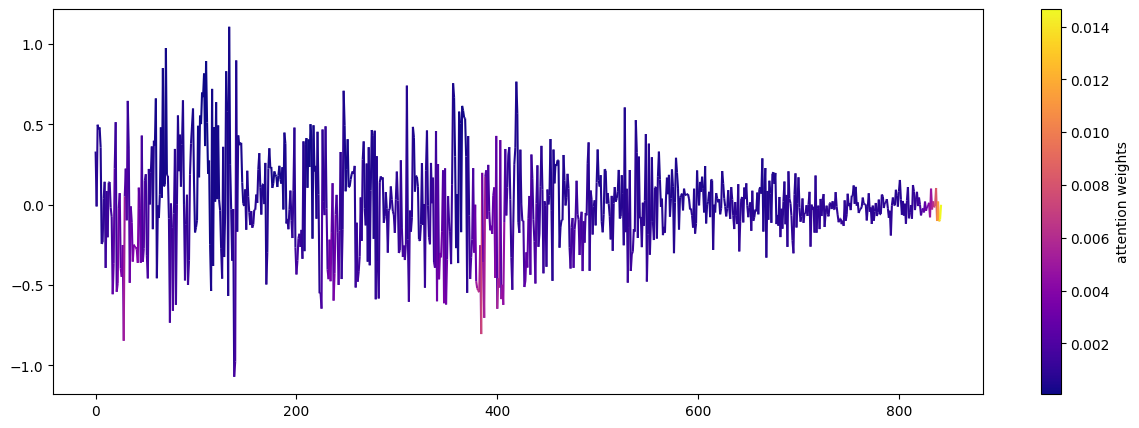

In [40]:
test_sample = X_test_RNN[[0]]
predictions, attention_w = dual_model.predict(test_sample)

print(f"Final Prediction: {predictions[0]}")
print(f"Shape of attention weights: {attention_w.shape}")

fig, ax, _ = plot_attention(test_sample, attention_w)
fig.set_size_inches(15, 5)
fig.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Final Prediction: [0.5066474  0.2516504  0.05580937 0.13013145 0.05576141]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Final Prediction: [0.46674058 0.15444447 0.11011587 0.1729767  0.09572231]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Final Prediction: [0.22682096 0.03817171 0.30581427 0.19237535 0.23681778]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Final Prediction: [0.48250234 0.33745858 0.03500062 0.10490813 0.04013044]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Final Prediction: [0.28287905 0.04118368 0.28360814 0.20746589 0.18486327]


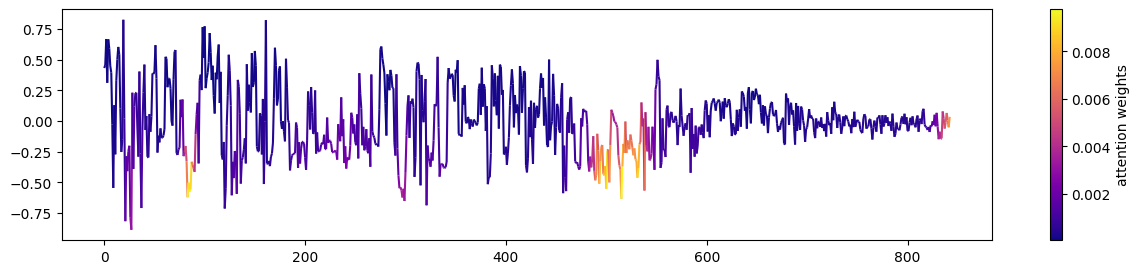

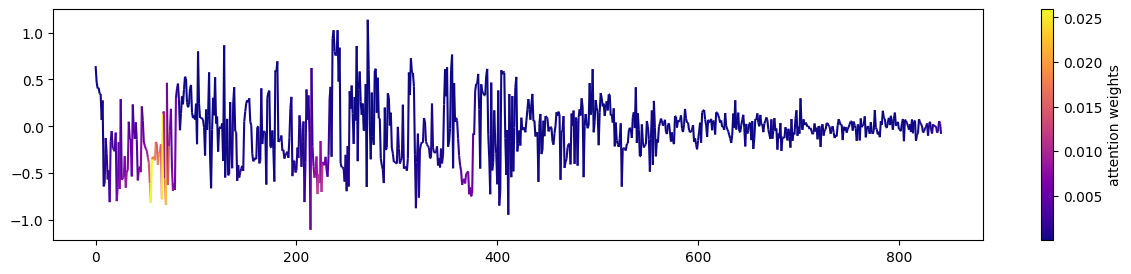

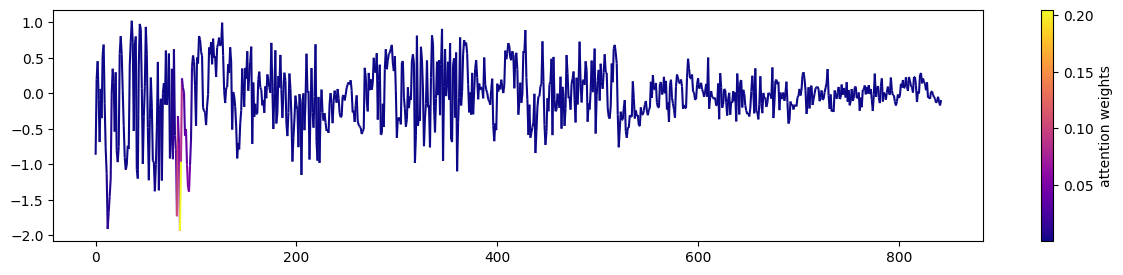

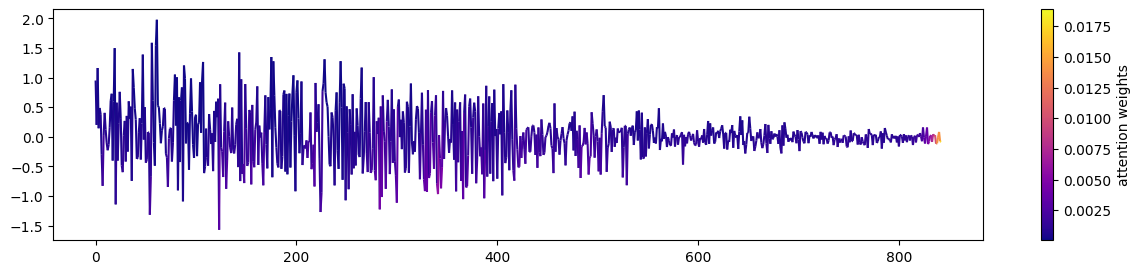

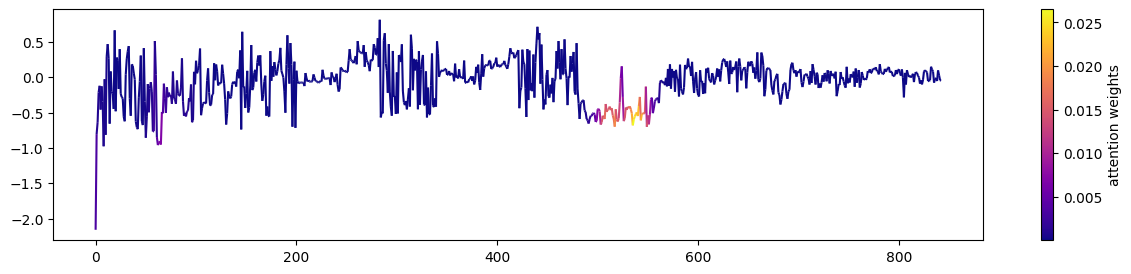

In [41]:
_, first_idx = np.unique(y_train_num, return_index=True)
for idx in first_idx:
  test_sample = X_train_RNN[[idx]]
  predictions, attention_w = dual_model.predict(test_sample)

  print(f"Final Prediction: {predictions[0]}")

  fig, ax, _ = plot_attention(test_sample, attention_w)
  fig.set_size_inches(15, 3)
  fig.show()

In [42]:
print( train_model.evaluate(X_train_RNN, y_train_num) )
print( train_model.evaluate(X_test_RNN , y_test_num ) )

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - accuracy: 0.5104 - loss: 1.1780
[1.1764659881591797, 0.515625]
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 294ms/step - accuracy: 0.6155 - loss: 1.1009
[1.2543092966079712, 0.442748099565506]


### Multivariate

Now the multivariate version.

In [43]:
step = 32
X_train_reduced = X_train[:, :, ::step]
X_test_reduced  = X_test [:, :, ::step]

X_train_RNN = X_train_reduced.transpose(0, 2, 1)
X_test_RNN  = X_test_reduced .transpose(0, 2, 1)

print("X_train shape: ", X_train_RNN.shape)


y_train_num = y_train.astype(int) - 1
y_test_num  = y_test .astype(int) - 1


perm = rng.permutation(n_cases)
X_train_RNN = X_train_RNN[perm]
y_train_num = y_train_num[perm]

print("y_train: ", y_train_num)

X_train shape:  (128, 562, 6)
y_train:  [4 0 3 0 0 3 0 0 3 0 3 0 0 1 0 4 0 0 0 3 2 2 0 4 1 2 3 2 1 2 0 1 2 1 4 0 2
 3 3 0 0 0 2 0 2 0 4 3 0 2 0 0 0 3 0 0 3 3 0 1 3 4 0 0 1 1 0 0 3 3 0 0 0 3
 0 0 0 1 0 0 2 4 3 0 0 1 1 4 3 0 1 1 0 2 0 1 1 1 2 0 2 0 1 4 0 1 0 0 1 3 0
 0 1 3 0 2 2 0 4 2 0 3 3 4 0 1 4 1]


In [44]:
MAX_LENGTH    = X_train_RNN.shape[1]
NUM_FEATURES  = n_channels
RNN_UNITS     = 64
ATT_UNITS     = RNN_UNITS*2
NUM_CLASSES   = n_classes
NUM_EPOCHS    = 10
BATCH_SIZE    = 8


inputs = keras.Input(shape=(MAX_LENGTH, NUM_FEATURES))

lstm, forward_h, forward_c, backward_h, backward_c = \
  keras.layers.Bidirectional(
    keras.layers.LSTM(
        RNN_UNITS,
        return_sequences  = True,
        return_state      = True
    )
  )(inputs)
state_h = keras.layers.Concatenate()([forward_h, backward_h])

attention_layer = BahdanauAttention(ATT_UNITS)
context_vector, attention_weights = attention_layer(state_h, lstm)

final_output = keras.layers.Dense(
    NUM_CLASSES,
    activation  = 'softmax'
)(context_vector)


train_model = keras.Model(
    inputs  = inputs,
    outputs = final_output
)

dual_model = keras.Model(
    inputs  = inputs,
    outputs = [final_output, attention_weights]
)


train_model.compile(
    optimizer = 'adam',
    loss      = 'sparse_categorical_crossentropy',
    metrics   = ['accuracy']
)

print(train_model.summary(), "\n")


train_model.fit(
    X_train_RNN,
    y_train_num,
    epochs      = NUM_EPOCHS,
    batch_size  = BATCH_SIZE,
    validation_split = 0.2
);

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 562, 6)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ [(None, 562,      │     36,352 │ input_layer_2[0]… │
│ (Bidirectional)     │ 128), (None, 64), │            │                   │
│                     │ (None, 64),       │            │                   │
│                     │ (None, 64),       │            │                   │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 128)       │          0 │ bidirectional_2[… │
│ (Concatenate)       │                   │            │ bidirectional_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bahdanau_attention… │ [(None, 128),     │     32,897 │ concatenate_2[0]… │
│ (BahdanauAttention) │ (None, 562, 1)]   │            │ bidirectional_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 5)         │        645 │ bahdanau_attenti… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 69,894 (273.02 KB)

 Trainable params: 69,894 (273.02 KB)

 Non-trainable params: 0 (0.00 B)

None 

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 396ms/step - accuracy: 0.3669 - loss: 1.5655 - val_accuracy: 0.3462 - val_loss: 1.5397
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 394ms/step - accuracy: 0.4063 - loss: 1.4230 - val_accuracy: 0.3462 - val_loss: 1.4790
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 432ms/step - accuracy: 0.4204 - loss: 1.3019 - val_accuracy: 0.5000 - val_loss: 1.3874
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 321ms/step - accuracy: 0.4960 - loss: 1.2517 - val_accuracy: 0.5000 - val_loss: 1.2520
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 314ms/step - accuracy: 0.6012 - loss: 1.0127 - val_accuracy: 0.4231 - val_loss: 1.1705
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 447ms/step - accuracy: 0.6211 - loss: 0.8953 - val_accuracy: 0.5769 - val_loss: 0.9862
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 396ms/step - accuracy: 0.6885 - loss: 0.7758 - val_accuracy: 0.5769 - val_loss: 0.9662
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 342ms/step - accuracy: 0.7971 - loss: 0.5754 - val_ac

In [45]:
test_sample = X_test_RNN[[0]]
predictions, attention_w = dual_model.predict(test_sample)

print(f"Final Prediction: {predictions[0]}")
print(f"Shape of attention weights: {attention_w.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
Final Prediction: [0.5176008  0.09921322 0.08862696 0.16404536 0.13051373]
Shape of attention weights: (1, 562, 1)


In [46]:
_, first_idx = np.unique(y_train_num, return_index=True)
for idx in first_idx:
  test_sample = X_train_RNN[[idx]]
  predictions, attention_w = dual_model.predict(test_sample)

  print(f"Final Prediction: {predictions[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Final Prediction: [0.85547566 0.10715721 0.00308219 0.02491582 0.00936918]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Final Prediction: [0.23451857 0.7382508  0.00414257 0.0179318  0.00515618]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Final Prediction: [0.01114745 0.00526644 0.96238524 0.00963024 0.01157063]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Final Prediction: [0.0844883  0.01451758 0.07027351 0.5477213  0.2829993 ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Final Prediction: [0.13942142 0.01782177 0.05432273 0.4431051  0.345329  ]


In [47]:
print( train_model.evaluate(X_train_RNN, y_train_num) )
print( train_model.evaluate(X_test_RNN , y_test_num ) )

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.8677 - loss: 0.4480
[0.5457876324653625, 0.828125]
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.7047 - loss: 0.8647
[1.0227725505828857, 0.6335877776145935]
